In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data Formatting and Parsing 

## Converting Data Types

In [2]:

# Sample data with numeric values as strings
data = {
    'Product_ID': ['P001', 'P002', 'P003'],
    'Price': ['10.99', '15.49', '20.00'],
    'Quantity': ['5', '7', '3']
}

df = pd.DataFrame(data)

# Check data types
print(df.dtypes)


Product_ID    object
Price         object
Quantity      object
dtype: object


In [3]:
# Convert 'Price' and 'Quantity' to numeric types
df['Price'] = df['Price'].astype(float)
df['Quantity'] = df['Quantity'].astype(int)

# Verify data types
print(df.dtypes)


Product_ID     object
Price         float64
Quantity        int64
dtype: object


## Parsing Dates

In [5]:
# Sample data with date as strings
data = {
    'Order_ID': [1001, 1002, 1003],
    'Order_Date': ['2023-01-15', 
                   '2023-02-20',
                   '2023-03-10']
}
df = pd.DataFrame(data)

# Check data types
print(df.dtypes)

Order_ID       int64
Order_Date    object
dtype: object


In [6]:
# Convert 'Order_Date' to datetime
df['Order_Date'] = pd.to_datetime(df['Order_Date'])

# Verify data types
print(df.dtypes)


Order_ID               int64
Order_Date    datetime64[ns]
dtype: object


# Feature Scaling

## Standardization (Z-score Scaling)

In [25]:
# Sample data
data = {
    'Height_cm': [150, 160, 180, 140, 110],
    'Weight_kg': [50, 60, 70, 80, 90]
}
df = pd.DataFrame(data)


In [26]:
from sklearn.preprocessing import StandardScaler
# Using the same data
df = pd.DataFrame(data)
# Apply Standardization
scaler = StandardScaler()
standardized_values = scaler.fit_transform(df)
df_standardized = pd.DataFrame(standardized_values,
                               columns=df.columns)
print(df_standardized)


   Height_cm  Weight_kg
0   0.086387  -1.414214
1   0.518321  -0.707107
2   1.382189   0.000000
3  -0.345547   0.707107
4  -1.641350   1.414214


In [22]:
np.std(df)

Height_cm    14.142136
Weight_kg    14.142136
dtype: float64

In [27]:
np.mean(df)

Height_cm    148.0
Weight_kg     70.0
dtype: float64

## Sacaling to a range

In [28]:
from sklearn.preprocessing import MinMaxScaler

df = pd.DataFrame(data)
# Apply Min-Max Scaling
scaler = MinMaxScaler()
scaled_values = scaler.fit_transform(df)

df_scaled = pd.DataFrame(scaled_values, 
                         columns=df.columns)
print(df_scaled)


   Height_cm  Weight_kg
0   0.571429       0.00
1   0.714286       0.25
2   1.000000       0.50
3   0.428571       0.75
4   0.000000       1.00


In [29]:
from sklearn.preprocessing import MaxAbsScaler

df = pd.DataFrame(data)
# Apply Min-Max Scaling
scaler = MaxAbsScaler()
scaled_values = scaler.fit_transform(df)

df_scaled = pd.DataFrame(scaled_values, 
                         columns=df.columns)
print(df_scaled)

   Height_cm  Weight_kg
0   0.833333   0.555556
1   0.888889   0.666667
2   1.000000   0.777778
3   0.777778   0.888889
4   0.611111   1.000000


# Encoding Categorical Variables (Features)

## One-hot Encoding

In [28]:
# Sample data
data = {
    'Item_ID': [1, 2, 3, 4],
    'Color': ['Red', 'Green', 'Blue', 'Green'],
    'Zipcode':['84335','84338', '84333','84335']
}
df = pd.DataFrame(data)
# Apply One-Hot Encoding
df_encoded = pd.get_dummies(df, columns=['Color','Zipcode'])
df_encoded


,Item_ID,Color_Blue,Color_Green,Color_Red,Zipcode_84333,Zipcode_84335,Zipcode_84338
0,1,0,0,1,0,1,0
1,2,0,1,0,0,0,1
2,3,1,0,0,1,0,0
3,4,0,1,0,0,1,0


## Label Encoding

In [29]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['Size']= ['Small', 'Medium', 'Large', 'Medium']
df['Size_Encoded'] = encoder.fit_transform(df['Size'])
df

,Item_ID,Color,Zipcode,Size,Size_Encoded
0,1,Red,84335,Small,2
1,2,Green,84338,Medium,1
2,3,Blue,84333,Large,0
3,4,Green,84335,Medium,1


## Ordinnal Encoding

In [31]:
# Define the order
size_mapping = {'Small': 1, 'Medium': 2, 'Large': 3}

# Map the sizes to integers
df['Size_Ordinal'] = df['Size'].map(size_mapping)
(df)


,Item_ID,Color,Zipcode,Size,Size_Encoded,Size_Ordinal
0,1,Red,84335,Small,2,1
1,2,Green,84338,Medium,1,2
2,3,Blue,84333,Large,0,3
3,4,Green,84335,Medium,1,2


# Data Discretization and Binning

## Equal-Width Binning

In [33]:
data = {'Age': [22, 35, 58, 45, 18, 80, 65, 30]}
df = pd.DataFrame(data)
# Apply Equal-Width Binning
df['Age_Bin_Equal_Width'] = pd.cut(df['Age'], bins=4)
df

,Age,Age_Bin_Equal_Width
0,22,"(17.938, 33.5]"
1,35,"(33.5, 49.0]"
2,58,"(49.0, 64.5]"
3,45,"(33.5, 49.0]"
4,18,"(17.938, 33.5]"
5,80,"(64.5, 80.0]"
6,65,"(64.5, 80.0]"
7,30,"(17.938, 33.5]"


## Equal-Frequency Binning

In [35]:
# Apply Equal-Frequency Binning
df['Age_Bin_Equal_Freq'] = pd.qcut(df['Age'], q=4)
df


,Age,Age_Bin_Equal_Width,Age_Bin_Equal_Freq
0,22,"(17.938, 33.5]","(17.999, 28.0]"
1,35,"(33.5, 49.0]","(28.0, 40.0]"
2,58,"(49.0, 64.5]","(40.0, 59.75]"
3,45,"(33.5, 49.0]","(40.0, 59.75]"
4,18,"(17.938, 33.5]","(17.999, 28.0]"
5,80,"(64.5, 80.0]","(59.75, 80.0]"
6,65,"(64.5, 80.0]","(59.75, 80.0]"
7,30,"(17.938, 33.5]","(28.0, 40.0]"


In [36]:
 pd.qcut(df['Age'], q=4)

0    (17.999, 28.0]
1      (28.0, 40.0]
2     (40.0, 59.75]
3     (40.0, 59.75]
4    (17.999, 28.0]
5     (59.75, 80.0]
6     (59.75, 80.0]
7      (28.0, 40.0]
Name: Age, dtype: category
Categories (4, interval[float64, right]): [(17.999, 28.0] < (28.0, 40.0] < (40.0, 59.75] < (59.75, 80.0]]

## K-Means Binning

In [38]:
from sklearn.cluster import KMeans

# Reshape data for KMeans
ages = df['Age'].values.reshape(-1, 1)

# Apply KMeans
kmeans = KMeans(n_clusters=4, random_state=0)
df['Age_Bin_KMeans'] = kmeans.fit_predict(ages)
df


,Age,Age_Bin_Equal_Width,Age_Bin_Equal_Freq,Age_Bin_KMeans
0,22,"(17.938, 33.5]","(17.999, 28.0]",2
1,35,"(33.5, 49.0]","(28.0, 40.0]",0
2,58,"(49.0, 64.5]","(40.0, 59.75]",1
3,45,"(33.5, 49.0]","(40.0, 59.75]",0
4,18,"(17.938, 33.5]","(17.999, 28.0]",2
5,80,"(64.5, 80.0]","(59.75, 80.0]",3
6,65,"(64.5, 80.0]","(59.75, 80.0]",1
7,30,"(17.938, 33.5]","(28.0, 40.0]",0


# Feature Engineering

## Mathematical Transformation

### Example 1: Logarithmic Transformation 

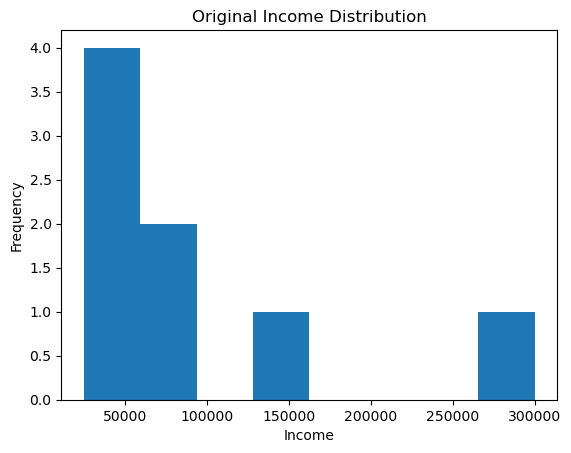

In [42]:
# Sample data
data = {'Income': [25000, 30000, 40000, 50000, 60000, 80000, 150000, 300000]}
df = pd.DataFrame(data)

# Original Income Distribution
plt.hist(df['Income'], bins=8)
plt.title('Original Income Distribution')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()


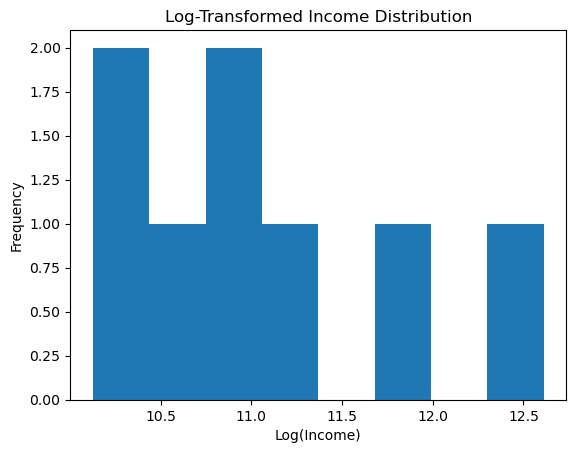

In [40]:
# Apply logarithmic transformation
df['Log_Income'] = np.log(df['Income'])

# Transformed Income Distribution
plt.hist(df['Log_Income'], bins=8)
plt.title('Log-Transformed Income Distribution')
plt.xlabel('Log(Income)')
plt.ylabel('Frequency')
plt.show()


### Square root transformation

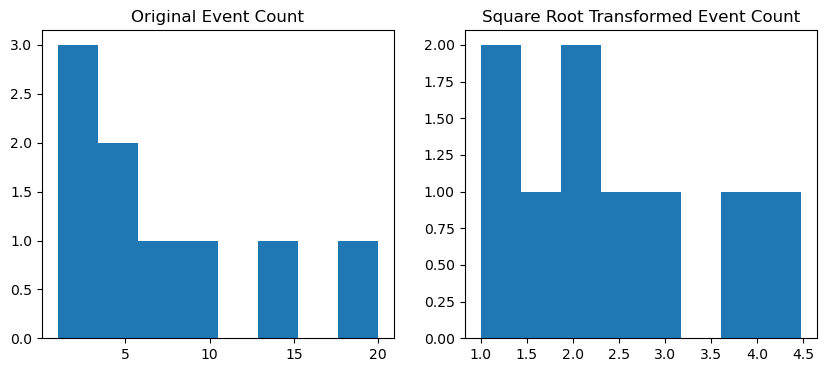

In [43]:
# Sample data with counts
data = {'Event_Count': [1, 2, 3, 4, 5, 6, 10, 15, 20]}
df = pd.DataFrame(data)

# Apply square root transformation
df['Sqrt_Event_Count'] = np.sqrt(df['Event_Count'])

# Plotting the original and transformed data
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
axes[0].hist(df['Event_Count'], bins=8)
axes[0].set_title('Original Event Count')
axes[1].hist(df['Sqrt_Event_Count'], bins=8)
axes[1].set_title('Square Root Transformed Event Count')
plt.show()



### Polynomial Features

In [47]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
X = np.arange(6).reshape(3, 2)
print(X)
poly = PolynomialFeatures(2)
poly.fit_transform(X)

[[0 1]
 [2 3]
 [4 5]]


array([[ 1.,  0.,  1.,  0.,  0.,  1.],
       [ 1.,  2.,  3.,  4.,  6.,  9.],
       [ 1.,  4.,  5., 16., 20., 25.]])

### Linearization

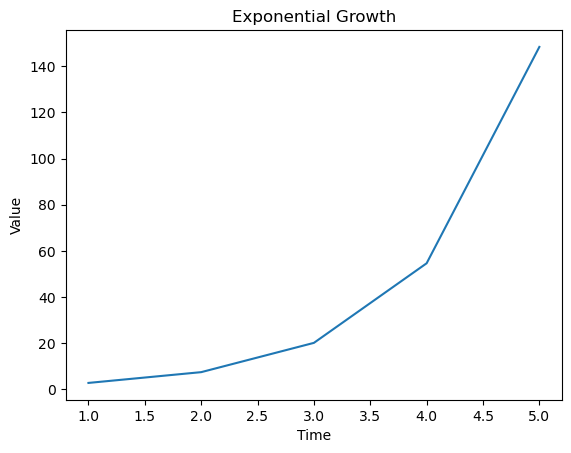

In [44]:
# Sample data
data = {'Time': [1, 2, 3, 4, 5]}
df = pd.DataFrame(data)
df['Value'] = np.exp(df['Time'])

# Plotting the data
plt.plot(df['Time'], df['Value'])
plt.title('Exponential Growth')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()


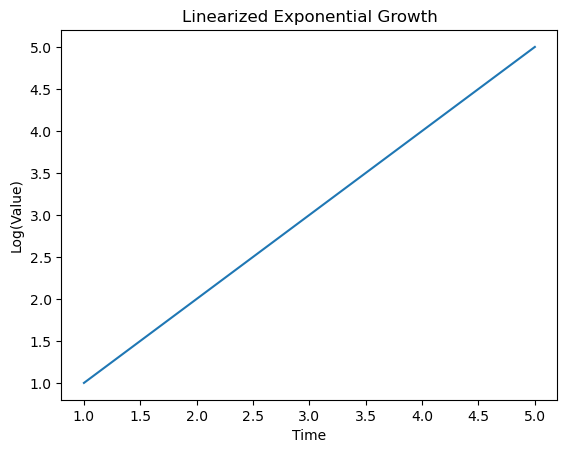

In [45]:
df['Log_Value'] = np.log(df['Value'])

# Plotting the transformed data
plt.plot(df['Time'], df['Log_Value'])
plt.title('Linearized Exponential Growth')
plt.xlabel('Time')
plt.ylabel('Log(Value)')
plt.show()


## Data Aggregation

### Sum

In [2]:
# Sample data
data = {'Sales': [200, 300, 250, 400, 150]}
df = pd.DataFrame(data)

# Calculate total sales
total_sales = df['Sales'].sum()
print(f"Total Sales: {total_sales}")


Total Sales: 1300


### Minimum

In [6]:
# Calculate minimum sales
min_sales = df['Sales'].min()
print(f"Minimum Sales: {min_sales}")


Minimum Sales: 150


### Maximum

In [8]:
# Calculate maximum sales
max_sales = df['Sales'].max()
print(f"Maximum Sales: {max_sales}")


Maximum Sales: 400


### Mean (averege)

In [9]:
# Calculate mean sales
mean_sales = df['Sales'].mean()
print(f"Mean Sales: {mean_sales}")

Mean Sales: 260.0


### Median

In [16]:
# Calculate median sales
median_sales = df['Sales'].median()
print(f"median Sales: {median_sales}")
data = {'Sales': [200, 300, 250, 50, 400, 150]}
df2 = pd.DataFrame(data)
median_sales = df2['Sales'].median()
print(f"median Sales: {median_sales}")

median Sales: 250.0
median Sales: 225.0


### Frequency 

In [23]:
# Sample data
data = {'Color': ['Red', 'Blue', 'Green', 
                  'Red', 'Blue', 'Red', 
                  'Green', 'Blue', 'Blue', 'Green']}
df = pd.DataFrame(data)

# Calculate frequency counts
color_counts = df['Color'].value_counts()
print("Frequency Counts of Colors:")
color_counts


Frequency Counts of Colors:


Blue     4
Red      3
Green    3
Name: Color, dtype: int64

In [30]:
data = {'Color': ['Red', 'Blue', 'Green', 
                  'Red', 'Blue', 'Red', 
                  'Green', 'Blue', 'Blue', 'Green'],
        'Sales':[10,15.8,12,12.8,9,10,11,77,22,33]}
df = pd.DataFrame(data)

# Calculate frequency counts
color_counts = df['Sales'].value_counts()
print("Frequency Counts of Colors:")
color_counts

Frequency Counts of Colors:


10.0    2
15.8    1
12.0    1
12.8    1
9.0     1
11.0    1
77.0    1
22.0    1
33.0    1
Name: Sales, dtype: int64

#### Relative frequency

In [24]:
# Calculate relative frequency
color_relative_freq = df['Color'].value_counts(normalize=True)
print("\nRelative Frequency of Colors:")
print(color_relative_freq)



Relative Frequency of Colors:
Blue     0.4
Red      0.3
Green    0.3
Name: Color, dtype: float64


#### Frequency distribution histogram

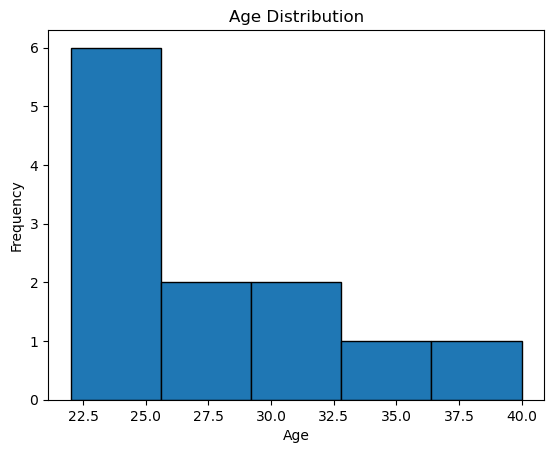

In [21]:
# Sample numerical data
data = {'Age': [22, 25, 29, 22, 25,
                30, 35, 40, 22, 29, 30, 25]}
df = pd.DataFrame(data)

# Plot histogram
plt.hist(df['Age'], bins=5, edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


### Quantiles

In [54]:
data = {'Values': [15, 20, 35, 40, 50, 55, 60, 70, 80, 95]}
df = pd.DataFrame(data)

# Calculate quartiles
Q1 = df['Values'].quantile(0.25,interpolation='linear')
Q2 = df['Values'].quantile(0.50)  # Median
Q3 = df['Values'].quantile(0.75)

print(f"First Quartile (Q1): {Q1}")
print(f"Second Quartile (Median, Q2): {Q2}")
print(f"Third Quartile (Q3): {Q3}")


First Quartile (Q1): 37.5
Second Quartile (Median, Q2): 52.5
Third Quartile (Q3): 67.5


In [56]:
for method in ['linear', 'lower', 'higher', 'midpoint', 'nearest']:
    print(method, df['Values'].quantile(0.25,interpolation=method))

linear 36.25
lower 35
higher 40
midpoint 37.5
nearest 35


#### Visualizing Quantiles with Box Plot

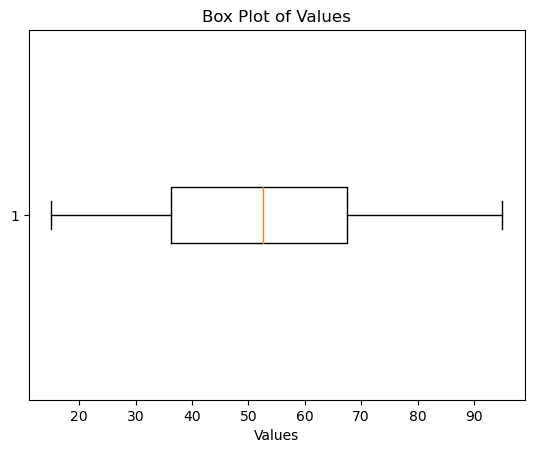

In [44]:
# Create a box plot
plt.boxplot(df['Values'], vert=False)
plt.title('Box Plot of Values')
plt.xlabel('Values')
plt.show()

### Standard deviation 

In [51]:
data = {'Age': [22, 25, 29, 22, 25,
                30, 35, 40, 22, 29],
        'Sales':[10,8,2,17,89,89,11,22,22,23],
        'Colors':['Blue','Blue','Green','Green',
                  'Green','Red','Green','Blue','Blue','Green']}
df = pd.DataFrame(data)
print (df.std())

Age       6.008328
Sales    32.200932
dtype: float64


### Entropy 

In [61]:
from scipy.stats import entropy

# Sample data
data = {'Label': ['Yes', 'No', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes']}
df = pd.DataFrame(data)

# Calculate frequency counts
label_counts = df['Label'].value_counts()
print("Label Counts:")
print(label_counts)

# Calculate probabilities
probabilities = label_counts / label_counts.sum()
print("\nProbabilities:")
print(probabilities)

# Calculate entropy
entropy_value = entropy(probabilities, base=2)
print(f"\nEntropy: {entropy_value:.4f}")


Label Counts:
Yes    6
No     4
Name: Label, dtype: int64

Probabilities:
Yes    0.6
No     0.4
Name: Label, dtype: float64

Entropy: 0.9710


In [60]:
-(0.4*np.log2(0.4)+0.6*np.log2(0.6))

0.9709505944546686

### Covariance and correlation 

In [64]:
data = {
    'Height_cm': [150, 160, 170, 180, 190],
    'Weight_kg': [50, 60, 65, 80, 85]
}
df = pd.DataFrame(data)
# Calculate covariance matrix
cov_matrix = df.cov()
print("Covariance Matrix:")
cov_matrix


Covariance Matrix:


,Height_cm,Weight_kg
Height_cm,250.0,225.0
Weight_kg,225.0,207.5


In [66]:
# Calculate correlation matrix
corr_matrix = df.corr()
print("\nCorrelation Matrix:")
(corr_matrix)


Correlation Matrix:


,Height_cm,Weight_kg
Height_cm,1.000000,0.987878
Weight_kg,0.987878,1.000000


### Mutual information 

In [12]:
data = {'Gender':['Female','Female','Female','Female','Male','Female','Female','Male','Male','Male'],
        'Color':['Blue','Blue','Green','Green','Green','Red','Green','Blue','Blue','Green']}

df = pd.DataFrame(data)
df

,Gender,Color
0,Female,Blue
1,Female,Blue
2,Female,Green
3,Female,Green
4,Male,Green
5,Female,Red
6,Female,Green
7,Male,Blue
8,Male,Blue
9,Male,Green


In [22]:
# Calculate joint frequency
joint_freq = pd.crosstab(df['Gender'], df['Color'])
print("Joint Frequency:")
print(joint_freq)

# Calculate joint probability
joint_prob = joint_freq / len(df)
print("\nJoint Probability:")
print(joint_prob)

# Marginal probabilities
P_Gender = df['Gender'].value_counts() / len(df)
P_Color = df['Color'].value_counts() / len(df)

# Calculate mutual information
I_GC = 0
for gender in P_Gender.index:
    for color in P_Color.index:
        P_xy = joint_prob.loc[gender, color]
        P_x = P_Gender[gender]
        P_y = P_Color[color]
        if P_xy > 0:
            I_GC += P_xy * np.log2(P_xy / (P_x * P_y))

print(f"\nMutual Information I(Gender; Color): {I_GC:.4f} bits")


Joint Frequency:
Color   Blue  Green  Red
Gender                  
Female     2      3    1
Male       2      2    0

Joint Probability:
Color   Blue  Green  Red
Gender                  
Female   0.2    0.3  0.1
Male     0.2    0.2  0.0

Mutual Information I(Gender; Color): 0.0855 bits


In [20]:
from scipy.stats.contingency import crosstab
from sklearn.metrics import mutual_info_score

c = crosstab(df['Color'], df['Gender'])
mutual_info_score(labels_true=None, labels_pred=None, contingency = c[1])

0.05924696128065016

#### Grouping and Aggregation

In [7]:
data = {
    'Region': ['North', 'South', 'East', 'West', 'North'],
    'Sales': [200, 300, 250, 400, 150]
}
df = pd.DataFrame(data)

# Group by 'Region' and calculate total sales
region_sales = df.groupby('Region')['Sales'].sum()
print("Total Sales by Region:")
region_sales


Total Sales by Region:


Region
East     250
North    350
South    300
West     400
Name: Sales, dtype: int64

#### Multiple aggregations


In [6]:
# Group by 'Region' and apply multiple aggregations
region_stats = df.groupby('Region')['Sales'].agg(['sum', 'mean', 'count'])
print("Sales Statistics by Region:")
(region_stats)


Sales Statistics by Region:


,sum,mean,count
Region,,,
East,250,250.0,1
North,350,175.0,2
South,300,300.0,1
West,400,400.0,1


#### Custom aggregation functions

In [8]:
# Define custom function to calculate range
def data_range(x):
    return x.max() - x.min()

# Group by 'Region' and apply custom function
region_custom = df.groupby('Region')['Sales'].agg(['sum', data_range])
print("Custom Aggregation - Sales Range by Region:")
region_custom


Custom Aggregation - Sales Range by Region:


,sum,data_range
Region,,
East,250,0
North,350,50
South,300,0
West,400,0


## [Specific technique] Handling Dates and Times

### Example 1 (Extracting date components)

In [4]:
data = {
    'Transaction_ID': [101, 102, 103],
    'Timestamp': ['2023-01-15 14:35:20', '2023-02-20 09:15:00', '2023-03-10 18:45:35']
}
df = pd.DataFrame(data)

# Convert 'Timestamp' to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Extract date components
df['Year'] = df['Timestamp'].dt.year
df['Month'] = df['Timestamp'].dt.month
df['Day'] = df['Timestamp'].dt.day
df['Hour'] = df['Timestamp'].dt.hour
df['Minute'] = df['Timestamp'].dt.minute
df['DayOfWeek'] = df['Timestamp'].dt.dayofweek  # Monday=0, Sunday=6

df


,Transaction_ID,Timestamp,Year,Month,Day,Hour,Minute,DayOfWeek
0,101,2023-01-15 14:35:20,2023,1,15,14,35,6
1,102,2023-02-20 09:15:00,2023,2,20,9,15,0
2,103,2023-03-10 18:45:35,2023,3,10,18,45,4


### Example 2 (Calculating time intervals)

In [5]:
data = {
    'Customer_ID': [1, 1, 1, 2, 2],
    'Transaction_Date': ['2023-01-01', '2023-01-10', '2023-01-20', '2023-02-15', '2023-03-01']
}
df = pd.DataFrame(data)

# Convert 'Transaction_Date' to datetime
df['Transaction_Date'] = pd.to_datetime(df['Transaction_Date'])

# Sort data by Customer_ID and Transaction_Date
df.sort_values(['Customer_ID', 'Transaction_Date'], inplace=True)

# Calculate time since last transaction
df['Days_Since_Last'] = df.groupby('Customer_ID')['Transaction_Date'].diff().dt.days

df


,Customer_ID,Transaction_Date,Days_Since_Last
0,1,2023-01-01,NaN
1,1,2023-01-10,9.0
2,1,2023-01-20,10.0
3,2,2023-02-15,NaN
4,2,2023-03-01,14.0


### Example 3 (Handling cyclic features)

In [8]:
data = {'Hour': range(0, 24)}
df = pd.DataFrame(data)

# Convert hour to radians
df['Hour_rad'] = df['Hour'] * (2 * np.pi / 24)

# Calculate sine and cosine transformations
df['Hour_sin'] = np.sin(df['Hour_rad'])
df['Hour_cos'] = np.cos(df['Hour_rad'])

df


,Hour,Hour_rad,Hour_sin,Hour_cos
0,0,0.000000,0.000000e+00,1.000000e+00
1,1,0.261799,2.588190e-01,9.659258e-01
2,2,0.523599,5.000000e-01,8.660254e-01
3,3,0.785398,7.071068e-01,7.071068e-01
4,4,1.047198,8.660254e-01,5.000000e-01
5,5,1.308997,9.659258e-01,2.588190e-01
6,6,1.570796,1.000000e+00,6.123234e-17
7,7,1.832596,9.659258e-01,-2.588190e-01
8,8,2.094395,8.660254e-01,-5.000000e-01
9,9,2.356194,7.071068e-01,-7.071068e-01


## Feature selection

### Variance Threshold

#### Example 1: Removing Constant Features

In [3]:
data = {
    'Feature_1': [0, 0, 0, 0, 0],
    'Feature_2': [1, 2, 3, 4, 5],
    'Feature_3': [5, 5, 5, 5, 5],
    'Feature_4': [10, 20, 10, 20, 10],
    'Feature_5': [1, 1, 2, 2, 3],
}

df = pd.DataFrame(data)
print("Original Data:")
df


Original Data:


,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5
0,0,1,5,10,1
1,0,2,5,20,1
2,0,3,5,10,2
3,0,4,5,20,2
4,0,5,5,10,3


In [15]:
from sklearn.feature_selection import VarianceThreshold

# Initialize VarianceThreshold with default threshold (0)
selector = VarianceThreshold()

# Fit the selector to the data
selector.fit(df)

# Get the boolean mask indicating which features are kept
features_mask = selector.get_support()

# Get the list of features that are kept
selected_features = df.columns[features_mask]

print("\nSelected Features:", list(selected_features))


Selected Features: ['Feature_2', 'Feature_4', 'Feature_5']


In [8]:
print(list(zip(selector.feature_names_in_,selector.variances_)))

[('Feature_1', 0.0), ('Feature_2', 2.0), ('Feature_3', 0.0), ('Feature_4', 10.0), ('Feature_5', 0.56)]


In [17]:
# Transform the data
df_reduced = selector.transform(df)

# Convert the transformed data back to a DataFrame
df_reduced = pd.DataFrame(df_reduced, columns=selected_features)

print("Data After Variance Threshold:")
df_reduced


Data After Variance Threshold:


,Feature_2,Feature_4,Feature_5
0,1,10,1
1,2,20,1
2,3,10,2
3,4,20,2
4,5,10,3


#### Example 2: Removing Features with Low Variance

In [23]:
selector = VarianceThreshold(threshold=1.0)
selector.fit(df)
features_mask = selector.get_support()
selected_features = df.columns[features_mask]
print("Selected Features with Variance >= 1.0:", list(selected_features))

Selected Features with Variance >= 1.0: ['Feature_2', 'Feature_4']


In [22]:
df_reduced = selector.transform(df)
df_reduced = pd.DataFrame(df_reduced, columns=selected_features)

print("Data After Applying Variance Threshold of 1.0:")
df_reduced

Data After Applying Variance Threshold of 1.0:


,Feature_2,Feature_4
0,1,10
1,2,20
2,3,10
3,4,20
4,5,10


#### Example 3: Variance Threshold on Real Dataset (Breast Cancer Dataset)

In [24]:
from sklearn.datasets import load_breast_cancer

# Load the dataset
data = load_breast_cancer()
X = data.data
y = data.target
feature_names = data.feature_names

# Convert to DataFrame
df = pd.DataFrame(X, columns=feature_names)
print("Dataset Shape:", df.shape)


Dataset Shape: (569, 30)


In [26]:
# Calculate variance of each feature
variances = df.var()

# Compute the median variance
threshold = variances.median()
print("Median Variance:", threshold)

# Initialize VarianceThreshold with threshold
selector = VarianceThreshold(threshold=threshold)

# Fit the selector to the data
selector.fit(df)

# Get selected features
features_mask = selector.get_support()
selected_features = feature_names[features_mask]

print("Selected Features:")
print(selected_features)
print("Number of Features Selected:", len(selected_features))


Median Variance: 0.005337994289761439
Selected Features:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean concavity' 'radius error' 'texture error' 'perimeter error'
 'area error' 'worst radius' 'worst texture' 'worst perimeter'
 'worst area' 'worst compactness' 'worst concavity']
Number of Features Selected: 15


In [27]:
# Transform the data
X_reduced = selector.transform(df)

# Convert back to DataFrame
df_reduced = pd.DataFrame(X_reduced, columns=selected_features)

print("\nReduced Dataset Shape:", df_reduced.shape)



Reduced Dataset Shape: (569, 15)


### Entropy

In [39]:
data = {
    'Color': ['Red', 'Blue', 'Green', 'Blue', 'Red', 'Red', 'Green', 'Blue', 'Blue', 'Red'],
    'Size': ['S', 'S', 'S', 'S', 'S', 'M', 'S', 'S', 'S', 'M'],
    'Available':['Y','N','Y','Y','Y','Y','N','N','Y','N']
}

df = pd.DataFrame(data)
print("Original Data:")
df

Original Data:


,Color,Size,Available
0,Red,S,Y
1,Blue,S,N
2,Green,S,Y
3,Blue,S,Y
4,Red,S,Y
5,Red,M,Y
6,Green,S,N
7,Blue,S,N
8,Blue,S,Y
9,Red,M,N


In [59]:
from scipy.stats import entropy

def calculate_entropy(column):
    counts = column.value_counts(normalize=True)
    entropy_value = -np.sum(counts * np.log2(counts + 1e-12))  # Add small value to avoid log(0)
    # or you can use 
    # entropy_value = entropy(counts, base=2)
    return entropy_value

# Calculate entropy for each feature
entropy_values = df.apply(calculate_entropy)
print("Entropy of Each Feature:")
print(entropy_values)

Entropy of Each Feature:
Color        1.521928
Size         0.721928
Available    0.970951
dtype: float64


In [60]:
# Set entropy threshold
threshold = 0.8
# Select features with entropy above the threshold
selected_features = entropy_values[entropy_values > threshold].index
print("Selected Features with Entropy > 0.8:", list(selected_features))

Selected Features with Entropy > 0.8: ['Color', 'Available']


In [61]:
# Filter the dataset
df_reduced = df[selected_features]
print("Data After Applying Entropy Threshold:")
(df_reduced)


Data After Applying Entropy Threshold:


,Color,Available
0,Red,Y
1,Blue,N
2,Green,Y
3,Blue,Y
4,Red,Y
5,Red,Y
6,Green,N
7,Blue,N
8,Blue,Y
9,Red,N


### Correlation matrix for feature selection

#### Example 1

In [62]:
df=pd.read_csv("buy.csv", columns=['Age','Time Spent',])
df

,age,membershipYears,numberOfFriends,AmountSpent,NumPurchases
0,21,2,5,100,2
1,38,0,10,10,1
2,18,0,5,25,1
3,19,5,30,1000,25
4,24,0,2,50,3
5,29,2,20,200,7
6,30,4,5,1500,15
7,31,2,70,150,5
8,40,0,11,70,4
9,44,0,8,10,1


In [69]:
df.corr()

,age,membershipYears,numberOfFriends,AmountSpent,NumPurchases
age,1.000000,-0.334731,-0.253233,-0.303731,-0.393919
membershipYears,-0.334731,1.000000,0.343459,0.851307,0.900591
numberOfFriends,-0.253233,0.343459,1.000000,0.085086,0.288885
AmountSpent,-0.303731,0.851307,0.085086,1.000000,0.853188
NumPurchases,-0.393919,0.900591,0.288885,0.853188,1.000000


In [70]:
df.corr()

,age,membershipYears,numberOfFriends,AmountSpent,NumPurchases
age,1.000000,-0.334731,-0.253233,-0.303731,-0.393919
membershipYears,-0.334731,1.000000,0.343459,0.851307,0.900591
numberOfFriends,-0.253233,0.343459,1.000000,0.085086,0.288885
AmountSpent,-0.303731,0.851307,0.085086,1.000000,0.853188
NumPurchases,-0.393919,0.900591,0.288885,0.853188,1.000000


In [67]:
df.mad()

age                   208.265152
membershipYears         2.810606
numberOfFriends       383.272727
AmountSpent        224664.204545
NumPurchases           52.787879
dtype: float64

In [71]:
df.var()

age                   208.265152
membershipYears         2.810606
numberOfFriends       383.272727
AmountSpent        224664.204545
NumPurchases           52.787879
dtype: float64

In [80]:
corr_matrix=df.corr()
# Set threshold
threshold = 0.8

# Find feature pairs with correlation above threshold
corr_pairs = corr_matrix.abs().unstack()
high_corr = corr_pairs[(corr_pairs > threshold) & (corr_pairs < 1)].drop_duplicates()

print("Highly Correlated Feature Pairs (Correlation > 0.9):")
print(high_corr)


Highly Correlated Feature Pairs (Correlation > 0.9):
membershipYears  AmountSpent     0.851307
                 NumPurchases    0.900591
AmountSpent      NumPurchases    0.853188
dtype: float64


In [81]:
# Drop redundant features
df_reduced = df.drop(columns=['membershipYears'])
df_reduced.head() 


,age,numberOfFriends,AmountSpent,NumPurchases
0,21,5,100,2
1,38,10,10,1
2,18,5,25,1
3,19,30,1000,25
4,24,2,50,3


#### Example 2: Correlation Matrix on Real Dataset (Iris Dataset)

In [83]:
from sklearn.datasets import load_iris

# Load dataset
data = load_iris()
X = data.data
y = data.target
feature_names = data.feature_names

# Create DataFrame
df = pd.DataFrame(X, columns=feature_names)
df['MEDV'] = y  # MEDV is the target variable
print("Dataset Shape:", df.shape)


Dataset Shape: (150, 5)


In [84]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),MEDV
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [86]:
# Compute correlation matrix
corr_matrix = df.corr()

print("Correlation Matrix:")
(corr_matrix)



Correlation Matrix:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),MEDV
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
MEDV,0.782561,-0.426658,0.949035,0.956547,1.000000


In [89]:
# Set threshold
threshold = 0.7

# Compute absolute correlation matrix
corr_matrix_abs = corr_matrix.abs()

# Create a mask to ignore the upper triangle (since it's symmetrical)
upper = corr_matrix_abs.where(np.triu(np.ones(corr_matrix_abs.shape), k=1).astype(bool))

# Find features with correlation above threshold
to_drop = [column for column in upper.columns if any(upper[column] > threshold) and column != 'MEDV']

print("Features to Drop (Correlation > 0.7):", to_drop)

Features to Drop (Correlation > 0.7): ['petal length (cm)', 'petal width (cm)']


In [91]:
# Drop features from the dataset
df_reduced = df.drop(columns=to_drop)

print("dataset after removing highly correlated ones:")
(df_reduced)


dataset after removing highly correlated ones:


,sepal length (cm),sepal width (cm),MEDV
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0
...,...,...,...
145,6.7,3.0,2
146,6.3,2.5,2
147,6.5,3.0,2
148,6.2,3.4,2


### Mutual information for feature selection

In [8]:
data = {
    'Color': ['Red', 'Blue', 'Green', 'Blue', 'Red', 'Red', 'Green', 'Blue', 'Blue', 'Red'],
    'Size': ['S', 'M', 'L', 'S', 'M', 'M', 'L', 'S', 'S', 'M'],
    'Shape': ['Circle', 'Square', 'Triangle', 'Circle', 'Triangle', 'Square', 'Circle', 'Square', 'Circle', 'Triangle'],
    'Texture': ['Smooth', 'Rough', 'Rough', 'Smooth', 'Smooth', 'Smooth', 'Rough', 'Rough', 'Smooth', 'Smooth']
}
df = pd.DataFrame(data)
df

,Color,Size,Shape,Texture
0,Red,S,Circle,Smooth
1,Blue,M,Square,Rough
2,Green,L,Triangle,Rough
3,Blue,S,Circle,Smooth
4,Red,M,Triangle,Smooth
5,Red,M,Square,Smooth
6,Green,L,Circle,Rough
7,Blue,S,Square,Rough
8,Blue,S,Circle,Smooth
9,Red,M,Triangle,Smooth


In [13]:
from scipy.stats.contingency import crosstab
from sklearn.metrics import mutual_info_score
def compute_mutual_info(df, feature1, feature2):
    c = crosstab(df[feature1], df[feature2])
    mi= mutual_info_score(labels_true=None, labels_pred=None, contingency = c[1])
    return mi

In [17]:
import itertools
# List of features
features = df.columns.tolist()
# Initialize a DataFrame to store MI values
mi_df = pd.DataFrame(index=features, columns=features)

# Compute MI for each pair
for feature1, feature2 in itertools.combinations(features, 2): 
    mi = compute_mutual_info(df, feature1, feature2)
    mi_df.loc[feature1, feature2] = mi
    mi_df.loc[feature2, feature1] = mi  # Mutual information is symmetric

# Fill diagonal with NaN since MI with itself is not meaningful
np.fill_diagonal(mi_df.values, np.nan)
print("Mutual Information Matrix:")
mi_df


Mutual Information Matrix:


,Color,Size,Shape,Texture
Color,NaN,0.605052,0.257123,0.395753
Size,0.605052,NaN,0.448078,0.223144
Shape,0.257123,0.448078,NaN,0.066169
Texture,0.395753,0.223144,0.066169,NaN


In [18]:
threshold = 0.5
# Find pairs with MI above the threshold
high_mi_pairs = []

for feature1 in features:
    for feature2 in features:
        if feature1 != feature2:
            mi = mi_df.loc[feature1, feature2]
            if mi is not None and mi > threshold:
                pair = tuple(sorted([feature1, feature2]))
                if pair not in high_mi_pairs:
                    high_mi_pairs.append(pair)

print("Feature Pairs with Mutual Information Above {:.2f}:".format(threshold))
for pair in high_mi_pairs:
    print(f"{pair[0]} and {pair[1]}: MI = {mi_df.loc[pair[0], pair[1]]:.4f}")


Feature Pairs with Mutual Information Above 0.50:
Color and Size: MI = 0.6051


#### MI between features and target (sklearn)

##### _mutual_info_classif_ example

In [ ]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.datasets import load_breast_cancer

# Load dataset
data = load_breast_cancer()
X = data.data
y = data.target
feature_names = data.feature_names

# Calculate mutual information
mi_scores = mutual_info_classif(X, y, random_state=42)

# Create a Series with MI scores
mi_scores_series = pd.Series(mi_scores, index=feature_names)
mi_scores_series = mi_scores_series.sort_values(ascending=False)

print("Mutual Information Scores:")
mi_scores_series.head(5)


#### _mutual_info_regression_ example

In [ ]:
from sklearn.feature_selection import mutual_info_regression
from sklearn.datasets import load_boston

# Load dataset
data = load_boston()
X = data.data
y = data.target
feature_names = data.feature_names

# Calculate mutual information
mi_scores = mutual_info_regression(X, y, random_state=42)

# Create a Series with MI scores
mi_scores_series = pd.Series(mi_scores, index=feature_names)
mi_scores_series = mi_scores_series.sort_values(ascending=False)

print("MI Scores for Regression:")
mi_scores_series.head(5)


### Chi-Squared Test for feature selection

####  Chi-Squared Test for feature selection (Real dataset)

In [32]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import KBinsDiscretizer

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

print("Features shape:", X.shape)
print("Labels shape:", y.shape)
# Initialize the discretizer
kbins = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')

# Fit and transform the features
X_binned = kbins.fit_transform(X)

print("\nDiscretized Features:\n", X_binned[:5])


Features shape: (150, 4)
Labels shape: (150,)

Discretized Features:
 [[1. 3. 0. 0.]
 [0. 2. 0. 0.]
 [0. 2. 0. 0.]
 [0. 2. 0. 0.]
 [0. 3. 0. 0.]]


In [33]:
# Apply the Chi-Squared test
chi2_scores, p_values = chi2(X_binned, y)

# Create a DataFrame to display the results
chi2_results = pd.DataFrame({
    'Feature': iris.feature_names,
    'Chi2 Score': chi2_scores,
    'p-value': p_values
})

print("\nChi-Squared Test Results:\n", chi2_results)



Chi-Squared Test Results:
              Feature  Chi2 Score       p-value
0  sepal length (cm)   75.717842  3.614760e-17
1   sepal width (cm)   25.655172  2.685654e-06
2  petal length (cm)  153.847826  3.911732e-34
3   petal width (cm)  160.423792  1.460213e-35


In [34]:
# Select the top 2 features
selector = SelectKBest(chi2, k=2)
X_new = selector.fit_transform(X_binned, y)

# Get the selected feature indices
selected_indices = selector.get_support(indices=True)
selected_features = [iris.feature_names[i] for i in selected_indices]

print("\nSelected Features:\n", selected_features)



Selected Features:
 ['petal length (cm)', 'petal width (cm)']


#### Chi-Squared Test for feature selection (toy dataset)

In [18]:
import numpy as np
import pandas as pd
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder

# Sample data
data = {
    'Color': ['Red', 'Blue', 'Green', 'Blue', 'Red', 'Green', 'Red', 'Blue'],
    'Shape': ['Square', 'Circle', 'Triangle', 'Circle', 'Square', 'Square', 'Triangle', 'Circle'],
    'Target': ['Yes', 'No', 'Yes', 'No', 'No', 'No', 'Yes', 'No']
}

df = pd.DataFrame(data)
df


,Color,Shape,Target
0,Red,Square,Yes
1,Blue,Circle,No
2,Green,Triangle,Yes
3,Blue,Circle,No
4,Red,Square,No
5,Green,Square,No
6,Red,Triangle,Yes
7,Blue,Circle,No


In [19]:
degree_of_freedom_color=(len(df['Color'].unique())-1) * (len(df['Target'].unique())-1)
degree_of_freedom_shape=(len(df['Shape'].unique())-1) * (len(df['Target'].unique())-1)

In [20]:
print("degree_of_freedom_color: {}, degree_of_freedom_shape {}".format(degree_of_freedom_color, degree_of_freedom_shape))

degree_of_freedom_color: 2, degree_of_freedom_shape 2


In [21]:
# Convert categorical variables to numeric
le = LabelEncoder()
for col in ['Color', 'Shape', 'Target']:
    df[col] = le.fit_transform(df[col])

X = df[['Color', 'Shape']]
y = df['Target']

# Compute Chi-Squared scores
chi_scores, p_values = chi2(X, y)

# Display results
for feature, score, p in zip(X.columns, chi_scores, p_values):
    print(f"{feature}: χ² = {score:.3f}, p = {p:.4f}")

Color: χ² = 2.133, p = 0.1441
Shape: χ² = 3.438, p = 0.0637


In [22]:
from scipy.stats import chi2

alpha = 0.05
critical_value = chi2.ppf(1 - alpha, degree_of_freedom_color) # or degree_of_freedom_shape since both are the same (i.e., 2)
print(f"Critical χ² value (α=0.05, df=2): {critical_value:.3f}")


Critical χ² value (α=0.05, df=2): 5.991


In [23]:
for feature, score, p in zip(X.columns, chi_scores, p_values):
    print(f"{feature:6s}: χ² = {score:.3f}, df = 2, p = {p:.4f}, "
          f"{'Dependent' if score > critical_value else 'Independent'}")


Color : χ² = 2.133, df = 2, p = 0.1441, Independent
Shape : χ² = 3.438, df = 2, p = 0.0637, Independent


### Recursive Feature Elimination (RFE)

In [24]:
from sklearn.datasets import load_iris
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

X, y = load_iris(return_X_y=True)
model = LogisticRegression(max_iter=1000)

# Select top 2 features
rfe = RFE(model, n_features_to_select=2)
rfe.fit(X, y)

print("Feature ranking:", rfe.ranking_)
print("Selected features:", rfe.support_)


Feature ranking: [3 2 1 1]
Selected features: [False False  True  True]


### Sequential Feature Selection (SFS) -- Forward

In [25]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris

X, y = load_iris(return_X_y=True)
model = LogisticRegression(max_iter=1000)

# Forward selection: build up features step by step
sfs = SequentialFeatureSelector(model, n_features_to_select=2, direction='forward')
sfs.fit(X, y)

print("Selected features:", sfs.get_support(indices=True))


Selected features: [2 3]


### Sequential Feature Selection (SFS) -- Backward

In [26]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris

X, y = load_iris(return_X_y=True)
model = LogisticRegression(max_iter=1000)

# Forward selection: build up features step by step
sfs = SequentialFeatureSelector(model, n_features_to_select=2, direction='backward')
sfs.fit(X, y)

print("Selected features:", sfs.get_support(indices=True))


Selected features: [2 3]


# PCA

## Example 1 (PCA)

Explained variance ratio: [0.96296464 0.03703536]


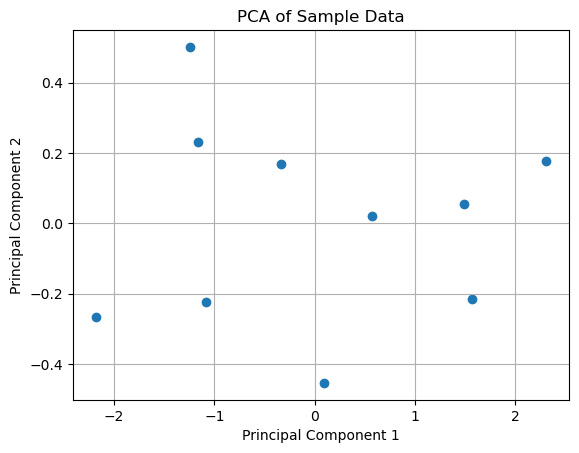

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Sample data
X = np.array([[2.5, 2.4],[0.5, 0.7],[2.2, 2.9],[1.9, 2.2],[3.1, 3.0],[2.3, 2.7],[2.0, 1.6],[1.0, 1.1],[1.5, 1.6],[1.1, 0.9]])

# Step 1: Standardize the data
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Step 2 & 3: Compute PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_std)

# Explained variance
print("Explained variance ratio:", pca.explained_variance_ratio_)

# Step 4: Plot the principal components
plt.scatter(principal_components[:, 0], principal_components[:, 1])
plt.title('PCA of Sample Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid()
plt.show()


## Example 2 (Step-by-step PCA)

### Centering the data

In [4]:
# Step 1: Center the Data (Subtract the Mean)
# Compute the mean of each feature (column)
mean_X = np.mean(X, axis=0)
print("\nMean of each feature:\n", mean_X)

# Subtract the mean from the original data
X_centered = X - mean_X
print("\nCentered Data:\n", X_centered)



Mean of each feature:
 [1.81 1.91]

Centered Data:
 [[ 0.69  0.49]
 [-1.31 -1.21]
 [ 0.39  0.99]
 [ 0.09  0.29]
 [ 1.29  1.09]
 [ 0.49  0.79]
 [ 0.19 -0.31]
 [-0.81 -0.81]
 [-0.31 -0.31]
 [-0.71 -1.01]]


### Compute the covariance matrix

In [5]:
# Step 2: Compute the Covariance Matrix
n_samples = X_centered.shape[0]
cov_matrix = np.dot(X_centered.T, X_centered) / (n_samples - 1)
print("\nCovariance Matrix:\n", cov_matrix)



Covariance Matrix:
 [[0.61655556 0.61544444]
 [0.61544444 0.71655556]]


### Eigenvalues and eigenvectors

In [13]:
# Step 3: Compute Eigenvalues and Eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print("\nEigenvalues:\n", eigenvalues)
print("\nEigenvectors:\n", eigenvectors)


Eigenvalues:
 [0.0490834  1.28402771]

Eigenvectors:
 [[-0.73517866 -0.6778734 ]
 [ 0.6778734  -0.73517866]]


### Sort Eigenvalues and Eigenvectors

In [16]:
# Step 4: Sort Eigenvalues and Eigenvectors
# Sort the eigenvalues in decreasing order
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]

print("\nSorted Eigenvalues:\n", sorted_eigenvalues)
print('\n "Sorted" Eigenvectors:\n', sorted_eigenvectors)
S=np.sum(sorted_eigenvalues)
explained_variances =[sorted_eigenvalues[0]/S,sorted_eigenvalues[1]/S]
print("\nExplained Varainces:\n", explained_variances)


Sorted Eigenvalues:
 [1.28402771 0.0490834 ]

 "Sorted" Eigenvectors:
 [[-0.6778734  -0.73517866]
 [-0.73517866  0.6778734 ]]

Explained Varainces:
 [0.963181314348646, 0.03681868565135408]


### Project the Data onto Principal Components

In [17]:
# Step 5: Project the Data onto Principal Components
# Select the top k eigenvectors 
k = 1
eigenvectors_subset = sorted_eigenvectors[:, :k]

# Project the centered data onto the new feature space
X_reduced = np.dot(X_centered, eigenvectors_subset)
print("\nProjected Data (onto first {} principal components):\n".format(k), X_reduced)


Projected Data (onto first 1 principal components):
 [[-0.82797019]
 [ 1.77758033]
 [-0.99219749]
 [-0.27421042]
 [-1.67580142]
 [-0.9129491 ]
 [ 0.09910944]
 [ 1.14457216]
 [ 0.43804614]
 [ 1.22382056]]


# Sampling

### Simple Random Sampling

In [49]:
# Create a sample dataset
data = {
    'ID': range(1, 101),
    'Value': [x * 2 for x in range(1, 101)]
}
df = pd.DataFrame(data)

# Simple random sampling without replacement
sample_size = 10
simple_random_sample = df.sample(n=sample_size, random_state=42)

print("Simple Random Sample:")
print(simple_random_sample)


Simple Random Sample:
    ID  Value
83  84    168
53  54    108
70  71    142
45  46     92
44  45     90
39  40     80
22  23     46
80  81    162
10  11     22
0    1      2


### Systematic Sampling

In [4]:
# Create a sample dataset
df = pd.DataFrame({'ID': range(1, 101)})
# Define the sampling interval k
k = 10
# Choose a random starting point between 0 and k-1
random_start = np.random.randint(0, k)
systematic_sample = df.iloc[random_start::k]
print("Systematic Sample:")
systematic_sample


Systematic Sample:


,ID
0,1
10,11
20,21
30,31
40,41
50,51
60,61
70,71
80,81
90,91


### Startified Sampling

In [12]:
data = {
    'ID': range(1, 101),
    'Category': ['A']*25 + ['B']*25 + ['C']*25 + ['D']*25,
    'Value': [x * 2 for x in range(1, 101)]
}
df = pd.DataFrame(data)
df 

,ID,Category,Value
0,1,A,2
1,2,A,4
2,3,A,6
3,4,A,8
4,5,A,10
...,...,...,...
95,96,D,192
96,97,D,194
97,98,D,196
98,99,D,198


In [13]:
from sklearn.model_selection import StratifiedShuffleSplit

# Prepare for stratified sampling
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(df, df['Category']):
    stratified_sample_test = df.iloc[test_index]
    stratified_sample_train = df.iloc[train_index]

print("Stratified Sample Test:")
print(stratified_sample_test['Category'].value_counts())
print("Stratified Sample Train:")
stratified_sample_train['Category'].value_counts()

Stratified Sample Test:
B    5
C    5
D    5
A    5
Name: Category, dtype: int64
Stratified Sample Train:


B    20
C    20
A    20
D    20
Name: Category, dtype: int64

### Cluster Sampling

In [28]:
# Create a sample dataset with clusters
data = {
    'ID': range(1, 101),
    'Cluster': np.repeat([1, 2, 3, 4, 5], 20),
    'Value': [x * 2 for x in range(1, 101)]
}
df = pd.DataFrame(data)
df

,ID,Cluster,Value
0,1,1,2
1,2,1,4
2,3,1,6
3,4,1,8
4,5,1,10
...,...,...,...
95,96,5,192
96,97,5,194
97,98,5,196
98,99,5,198


In [34]:
# Randomly select clusters
clusters = df['Cluster'].unique()
selected_clusters = np.random.choice(clusters, size=2, replace=False)
cluster_sample = df[df['Cluster'].isin(selected_clusters)]

print("Selected Clusters:", selected_clusters)
print("Cluster Sample:")
cluster_sample['Cluster'].value_counts()


Selected Clusters: [2 3]
Cluster Sample:


2    20
3    20
Name: Cluster, dtype: int64

### Convience Sampling

In [36]:
# Create a sample dataset
df = pd.DataFrame({'ID': range(1, 101), 'Value': range(100, 0, -1)})
# Convenience sample: select the first 10 rows
convenience_sample = df.head(10)
print("Convenience Sample:")
convenience_sample


Convenience Sample:


,ID,Value
0,1,100
1,2,99
2,3,98
3,4,97
4,5,96
5,6,95
6,7,94
7,8,93
8,9,92
9,10,91


### Reservoir Sampling

In [47]:
import random

def reservoir_sampling(stream, k):
    reservoir = []
    for i, data_point in enumerate(stream):
        if i < k:
            reservoir.append(data_point)
        else:
            j = random.randint(0, i)
            if j < k:
                reservoir[j] = data_point
    return reservoir

# Simulate a data stream
stream = range(1, 10001)  # Stream of 10,000 data points
sample_size = 10
reservoir_sample = reservoir_sampling(stream, sample_size)

print("Reservoir Sample:",reservoir_sample)

Reservoir Sample: [8800, 6228, 8776, 9768, 183, 3614, 2310, 6624, 3237, 1649]
